## Email Spam Detection with Machine Learning.

#### _Import Necessary Libraries_

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#### _Load Dataset_

In [4]:
data = pd.read_csv("E:\Oasis_InfoByte\CSV_FILES\spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### _EDA_

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
data.columns = ['label', 'text']

In [6]:
data.isna().sum()

label    0
text     0
dtype: int64

In [7]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

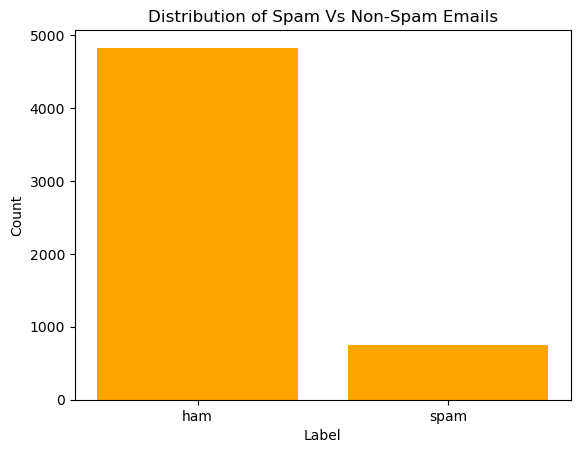

In [15]:
spam_counts = data['label'].value_counts()
plt.bar(spam_counts.index, spam_counts.values, color='orange')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam Vs Non-Spam Emails')
plt.show()

__Analyze Common Words__

In [16]:
# Get Spam and ham Dataset
spam_data = data[data['label'] == 'spam']
ham_data = data[data['label'] == 'ham']

# Get every word of each spam and ham email and put them in an array
spam_words = ' '.join(spam_data['text']).split()
ham_words = ' '.join(ham_data['text']).split()

from collections import Counter
# Count how many each word appeared in the emails
spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)

In [17]:
spam_data.head()

,label,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [18]:
ham_data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [19]:
spam_words[:5]

['Free', 'entry', 'in', '2', 'a']

In [20]:
dict(list(spam_word_counts.items())[:5])

{'Free': 35, 'entry': 25, 'in': 64, '2': 169, 'a': 358}

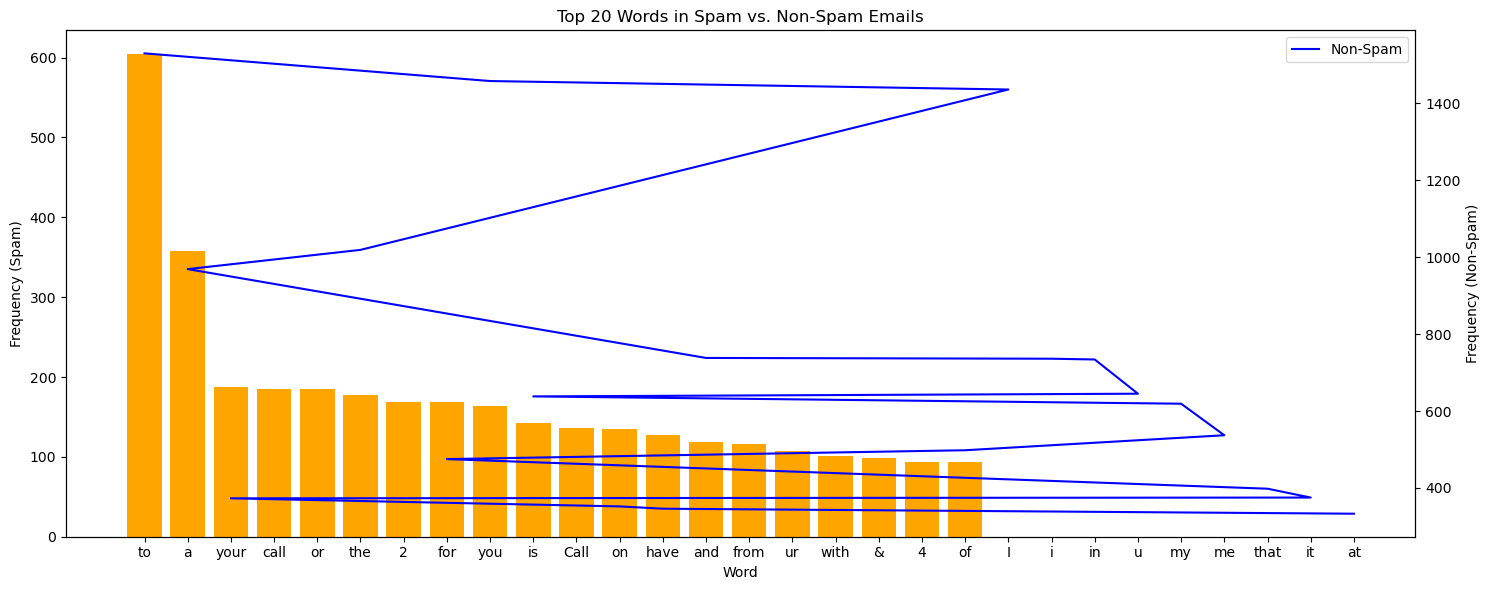

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))

# Extract words from the NumPy array (assuming most_common returns tuples)
words = [word for word, count in spam_word_counts.most_common(20)[:20]]

# Plot spam word counts in orange bars on primary y-axis
ax.bar(words, [count for word, count in spam_word_counts.most_common(20)], color='orange', label='Spam')

# Create a twin axis for non-spam word counts (blue line)
twin_ax = ax.twinx()
twin_ax.plot([word for word, count in ham_word_counts.most_common(20)][:20], [count for word, count in ham_word_counts.most_common(20)], color='blue', label='Non-Spam')

# Set labels and title
ax.set_xlabel('Word')
ax.set_ylabel('Frequency (Spam)')
twin_ax.set_ylabel('Frequency (Non-Spam)')
plt.title('Top 20 Words in Spam vs. Non-Spam Emails')

# Rotate x-axis labels and add legend
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

The x-axis represents the "Word," which likely refers to the most frequent words found in emails. 

The code extracts these words from spam_word_counts and ham_word_counts, assuming these variables store the frequency counts for words in spam and non-spam emails, respectively.

The y-axis on the left (labeled "Frequency (Spam)") represents the frequency of each word appearing in spam emails. This is depicted by the orange bars.

The y-axis on the right (labeled "Frequency (Non-Spam)") represents the frequency of each word appearing in non-spam emails. This is depicted by the blue line.

In [24]:
# Create the spam column
data['spam'] = data['label'].apply(lambda x : 1 if x == 'spam' else 0)

In [25]:
data.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [27]:
# Create X and Y
X = data['text']
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [28]:
y = data['spam']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: int64

Feature Engineering

In [29]:
# Text Encoding : Converting text into numerical representations using TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [32]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Handling Imbalanced Data

In [34]:
 # Oversampling : Creating Synthetic samples of the minority class (spam) to balance the dataset.

In [35]:
# Show the count of spam and ham

data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Resample training data using RandomOverSampler

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

over_sampler = RandomOverSampler(random_state = 42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 8672), (1115, 8672), (4457,), (1115,))

In [38]:
X_train_resampled.shape, y_train_resampled.shape

((7720, 8672), (7720,))

In [39]:
y_train_resampled

0       0
1       1
2       0
3       0
4       1
       ..
7715    1
7716    1
7717    1
7718    1
7719    1
Name: spam, Length: 7720, dtype: int64

### _Neural Network Model using TensorFlow_

In [41]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

model = Sequential([
    Dense(100, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
model.fit(X_train_resampled.toarray(), y_train_resampled, epochs = 5, batch_size = 32)

Epoch 1/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9015 - loss: 0.3515
Epoch 2/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9999 - loss: 0.0016
Epoch 3/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 1.0000 - loss: 2.9359e-04
Epoch 4/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 1.0000 - loss: 1.3633e-04
Epoch 5/5
242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 1.0000 - loss: 7.8928e-05


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │         867,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,620,175 (10.00 MB)

 Trainable params: 873,391 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,746,784 (6.66 MB)

#### _Evaluation of Model_

In [43]:
model.evaluate(X_test.toarray(), y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.0641   


[0.10395360738039017, 0.9775784611701965]

Making Predictions

In [44]:
preds = model.predict(X_test.toarray())

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [45]:
preds[:5]

array([[3.5997853e-04],
       [1.2560312e-05],
       [9.8688245e-01],
       [2.5429724e-06],
       [9.9999905e-01]], dtype=float32)

#### _Classification Report_

In [46]:
from sklearn.metrics import classification_report

binary_preds = (preds > 0.5).astype(int)
report = classification_report(y_test, binary_preds)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Predict on New Emails

In [48]:
new_emails_array = [
    "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.",
    "Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!",
    "Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.",
    "URGENT: Your account has been locked. Please verify your identity to unlock it.",
    "Hi there, just wanted to check in and see how you're doing. Let's catch up soon!"
]

new_emails_tfidf = tfidf_vectorizer.transform(new_emails_array)
new_emails_preds = model.predict(new_emails_tfidf.toarray())

binary_pred = (new_emails_preds > 0.5).astype(int)
for i in range (len(new_emails_preds)):
    print(f"Email : {new_emails_array[i]}. {'spam❌' if binary_pred[i] == 1 else 'ham✅'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Email : Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.. spam❌
Email : Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!. spam❌
Email : Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.. ham✅
Email : URGENT: Your account has been locked. Please verify your identity to unlock it.. spam❌
Email : Hi there, just wanted to check in and see how you're doing. Let's catch up soon!. ham✅


### _SKlearn Models_

In [50]:
# Initialize classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

nb_classifier = MultinomialNB()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()

my_models = [nb_classifier, svm_classifier, dt_classifier]
bin

Train Classifiers

In [51]:
for m in (my_models):
    m.fit(X_train, y_train)

Making Predictions

In [53]:
for m in (my_models):
    y_pred = m.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{m} Accuracy on test set : {accuracy * 100 : .2f}")

MultinomialNB() Accuracy on test set :  96.23
SVC() Accuracy on test set :  97.67
DecisionTreeClassifier() Accuracy on test set :  97.04


In [55]:
new_emails_array = [
     "Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.",
    "Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!",
    "Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.",
    "URGENT: Your account has been locked. Please verify your identity to unlock it.",
    "Hi there, just wanted to check in and see how you're doing. Let's catch up soon!"
]

new_emails_tfidf = tfidf_vectorizer.transform(new_emails_array)
new_emails_preds = svm_classifier.predict(new_emails_tfidf.toarray())

binary_pred = (new_emails_preds > 0.5).astype(int)
for i in range(len(new_emails_preds)):
    print(f"Email : {new_emails_array[i]}. {'spam❌' if binary_pred[i] == 1 else 'ham✅'}")

Email : Congratulations! You've won a free trip to Hawaii. Click here to claim your prize.. spam❌
Email : Dear valued customer, we're offering a 50% discount on all our products. Don't miss out!. ham✅
Email : Reminder: Your appointment with Dr. Smith is scheduled for tomorrow at 10:00 AM.. ham✅
Email : URGENT: Your account has been locked. Please verify your identity to unlock it.. ham✅
Email : Hi there, just wanted to check in and see how you're doing. Let's catch up soon!. ham✅


## _Conclusion_

This code demonstrates the basic functionalities of an email spam detection system using a neural network model.

By addressing data preprocessing, evaluating on unseen data, and potentially refining the model, one can enhance its effectiveness and robustness in real-world email classification tasks.

Strengths:

Neural Network Model: Implemented a neural network architecture with multiple hidden layers, capable of learning complex patterns in the email data for spam detection.

Resampled Training Data: Resampling techniques might have helped address potential imbalances in the original training data, leading to a more balanced learning process.

Good Performance: The classification report indicates high accuracy, precision, and recall for both spam and non-spam emails, suggesting the model effectively classifies emails in the testing set.